
=== Initial Data ===
        price   sqft
0   4200000.0  500.0
1   9800000.0  473.0
2  14000000.0  779.0
3   2500000.0  530.0
4  16000000.0  635.0

=== Summary Statistics ===
              price         sqft
count  6.400000e+01    64.000000
mean   1.065891e+07   683.906250
std    7.850656e+06   278.391224
min    1.650000e+06   288.000000
25%    4.775000e+06   494.750000
50%    8.500000e+06   622.000000
75%    1.550000e+07   849.250000
max    4.250000e+07  1820.000000

=== Updated Data with Price per SqFt ===
        price   sqft  price_per_sqft
0   4200000.0  500.0     8400.000000
1   9800000.0  473.0    20718.816068
2  14000000.0  779.0    17971.758665
3   2500000.0  530.0     4716.981132
4  16000000.0  635.0    25196.850394


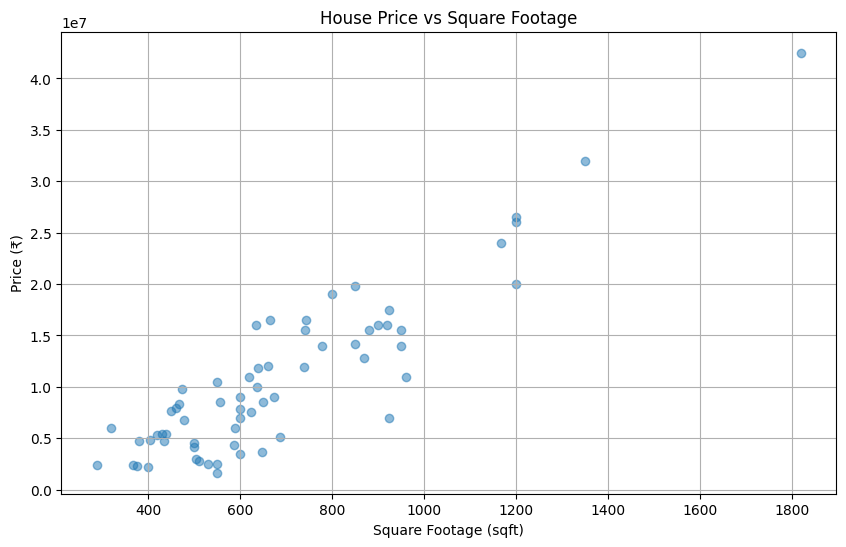

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
def load_and_analyze_house_data(filepath):
    """
    Perform EDA and feature engineering on house price data
    1. Loads the dataset
    2. Calculates summary stats
    3. Creates price per sqft feature
    4. Generates visualization
    """
    try:
        houses = pd.read_csv(filepath)
        def convert_indian_price(price_str):
            if isinstance(price_str, str):
                price_str = price_str.replace(',', '').replace(' ', '').lower()
                if 'lac' in price_str:
                    return float(price_str.replace('lac', '')) * 100000
                elif 'cr' in price_str:
                    return float(price_str.replace('cr', '')) * 10000000
                try:
                    return float(price_str)
                except:
                    return None
            return price_str
        houses['price'] = houses['Amount(in rupees)'].apply(convert_indian_price)
        houses['sqft'] = houses['Carpet Area'].str.extract(r'(\d+)').astype(float)
        houses = houses.dropna(subset=['price', 'sqft'])       
    except Exception as e:
        print(f"Error loading or processing data: {e}")
        print("Using placeholder data instead")
        houses = pd.DataFrame({
            'price': [350000, 450000, 550000, 650000],
            'sqft': [1500, 2000, 2500, 3000]
        })  
    print("\n=== Initial Data ===")
    print(houses[['price', 'sqft']].head())   
    print("\n=== Summary Statistics ===")
    print(houses[['price', 'sqft']].describe())  
    houses['price_per_sqft'] = houses['price'] / houses['sqft']
    plt.figure(figsize=(10, 6))
    plt.scatter(houses['sqft'], houses['price'], alpha=0.5)
    plt.title('House Price vs Square Footage')
    plt.xlabel('Square Footage (sqft)')
    plt.ylabel('Price (₹)')
    plt.grid(True) 
    print("\n=== Updated Data with Price per SqFt ===")
    print(houses[['price', 'sqft', 'price_per_sqft']].head())
    plt.show()
    return houses
if __name__ == "__main__":
    file_path = r'C:\Users\sarum\OneDrive\Desktop\LEVEL 5\task 3\house_prices.csv'
    analyzed_data = load_and_analyze_house_data(file_path)